## Carryout the same procedures as previously on a new data set
- Drop entries with NaNs
- Drop columns that would be no use in a model, such as 'id'
- Drop all non numeric columns
- Define Outliers as we did before using the IQR
- Remove these outliers
- Make sure to check at each step as you proceed to identify any errors you may have made
- Visualising the data along the way helps with this
- Retype code rather than copy and paste as it will help you get familiar with the syntax

In [1]:
import pandas as pd

# reading in data
df= pd.read_csv('data/AB_NYC_2019.csv')

# displaying info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Fir

Context

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.


Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.


Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this website.


For the rest you are on our own, but the target info and distributions is displayed at the bottom of this notebook

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20500 entries, 5 to 48852
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        20500 non-null  float64
 1   longitude                       20500 non-null  float64
 2   price                           20500 non-null  int64  
 3   minimum_nights                  20500 non-null  int64  
 4   number_of_reviews               20500 non-null  int64  
 5   reviews_per_month               20500 non-null  float64
 6   calculated_host_listings_count  20500 non-null  int64  
 7   availability_365                20500 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.4 MB


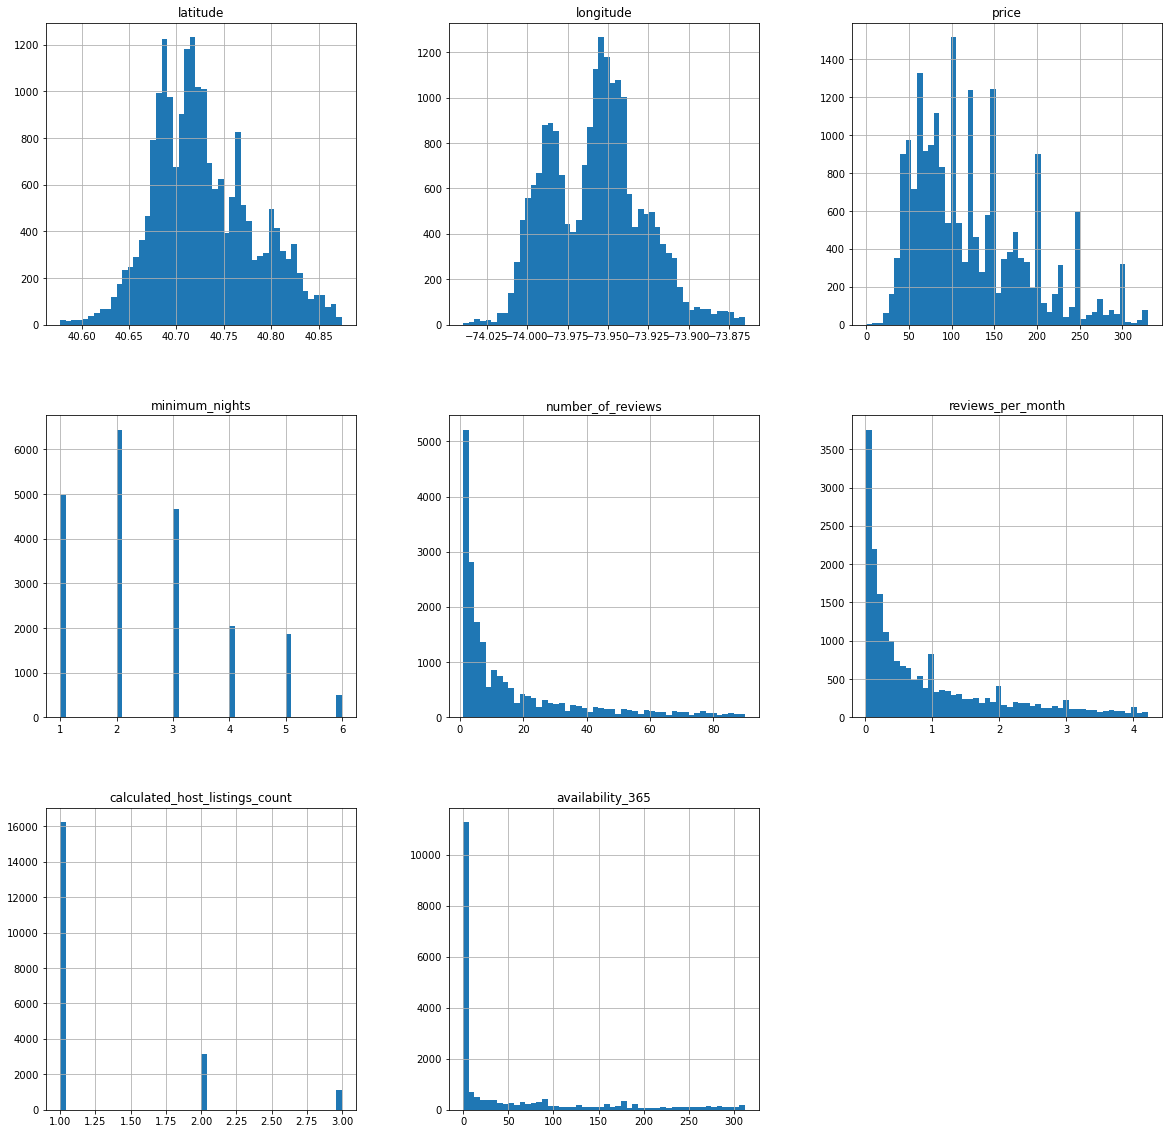

In [26]:
df.hist(bins = 50, figsize = (20,20));

<details>
    <summary style="color:green;font-weight:bold">Solution</summary>
    
    
    ## drop colums we are not interestd in

    # dropping id columns
    df.drop(columns = ['id','host_id'], inplace=True)

    # dropping all columns that are objects
    for column in df.columns:
        if df[column].dtype == 'object':
            df.drop(columns = column, inplace=True)
    
    # Define our outlier function
    def outliers(df, feature):
        Q1= df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        return upper_limit, lower_limit
    
    # apply to the columns
    for column in df.columns:
        upper, lower = outliers(df,column)
        df = df[(df[column] > lower) & (df[column] < upper)]
   
    